# Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('steam_data_final.csv')

### Creating target variable - estimated Steam sales

In [ ]:
# The Boxleiter coefficient, or NB number. This is our multiplier for estimating sales from reviews.
# We're using 40 as a balanced, conservative estimate based on the project plan.
SALES_MULTIPLIER = 40

df['EstimatedSales'] = df['Total Reviews'] * SALES_MULTIPLIER

df['EstimatedSales'] = df['EstimatedSales'].astype(int)

print("--- 'EstimatedSales' Column Creation Complete ---")
print("\n--- Sample of Estimated Sales ---")
print(df[['Name', 'Total Reviews', 'EstimatedSales']].head())

print("\n--- Statistical Summary of Estimated Sales ---")
print(df['EstimatedSales'].describe().apply("{:,.0f}".format))

--- 'EstimatedSales' Column Creation Complete ---

--- Sample of Estimated Sales ---
              Name  Total Reviews  EstimatedSales
0       Townscaper          10410          416400
1  Tormented Souls           2149           85960
2            Waven              7             280
3     Arcadegeddon            174            6960
4    YKMET: Strade            403           16120

--- Statistical Summary of Estimated Sales ---
count         4,870
mean        333,728
std       1,459,794
min               0
25%           2,480
50%          40,980
75%         189,810
max      54,134,360
Name: EstimatedSales, dtype: object


### Key Feature Distributions

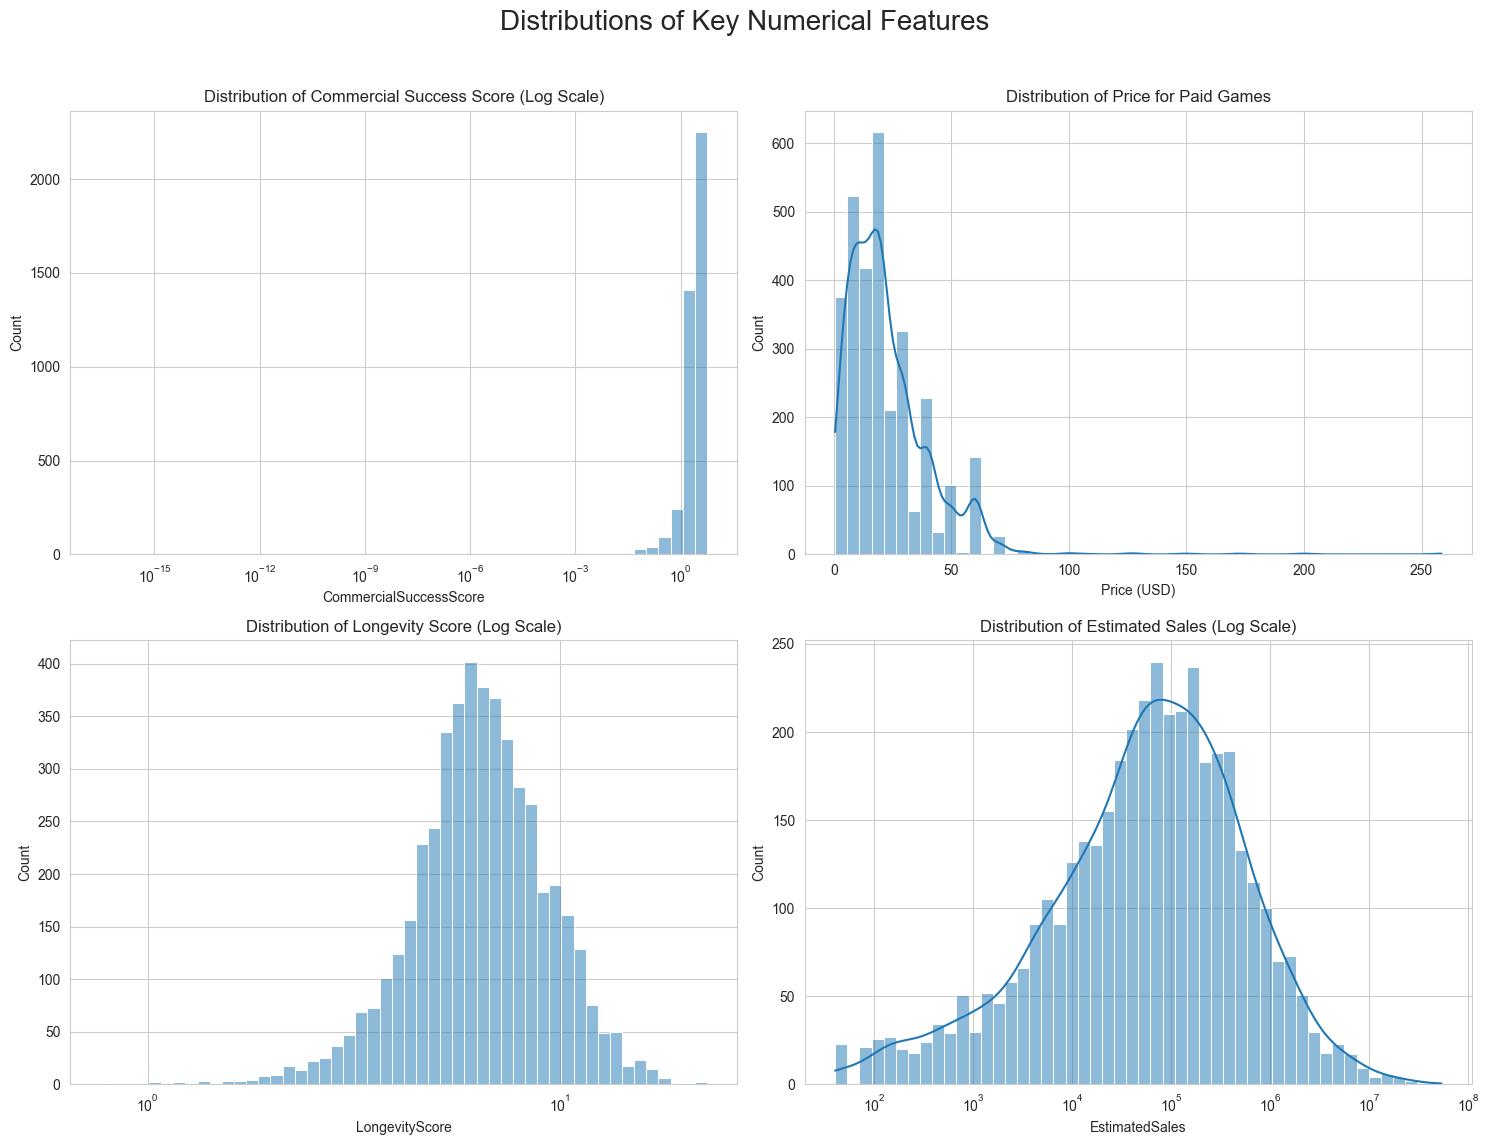

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=RuntimeWarning)

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distributions of Key Numerical Features', fontsize=20)

score_data = df['CommercialSuccessScore'].dropna()
sns.histplot(score_data, bins=50, kde=True, ax=axes[0, 0], log_scale=True)
axes[0, 0].set_title('Distribution of Commercial Success Score (Log Scale)')

price_data = df['Price (USD)'].dropna()
paid_games_prices = price_data[price_data > 0]
sns.histplot(paid_games_prices, bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Price for Paid Games')
axes[0, 1].set_xlabel('Price (USD)')

longevity_data = df['LongevityScore'].dropna()
sns.histplot(longevity_data, bins=50, kde=True, ax=axes[1, 0], log_scale=True)
axes[1, 0].set_title('Distribution of Longevity Score (Log Scale)')

sales_data = df[df['EstimatedSales'] > 0]['EstimatedSales'].dropna()
sns.histplot(sales_data, bins=50, kde=True, ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Distribution of Estimated Sales (Log Scale)')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

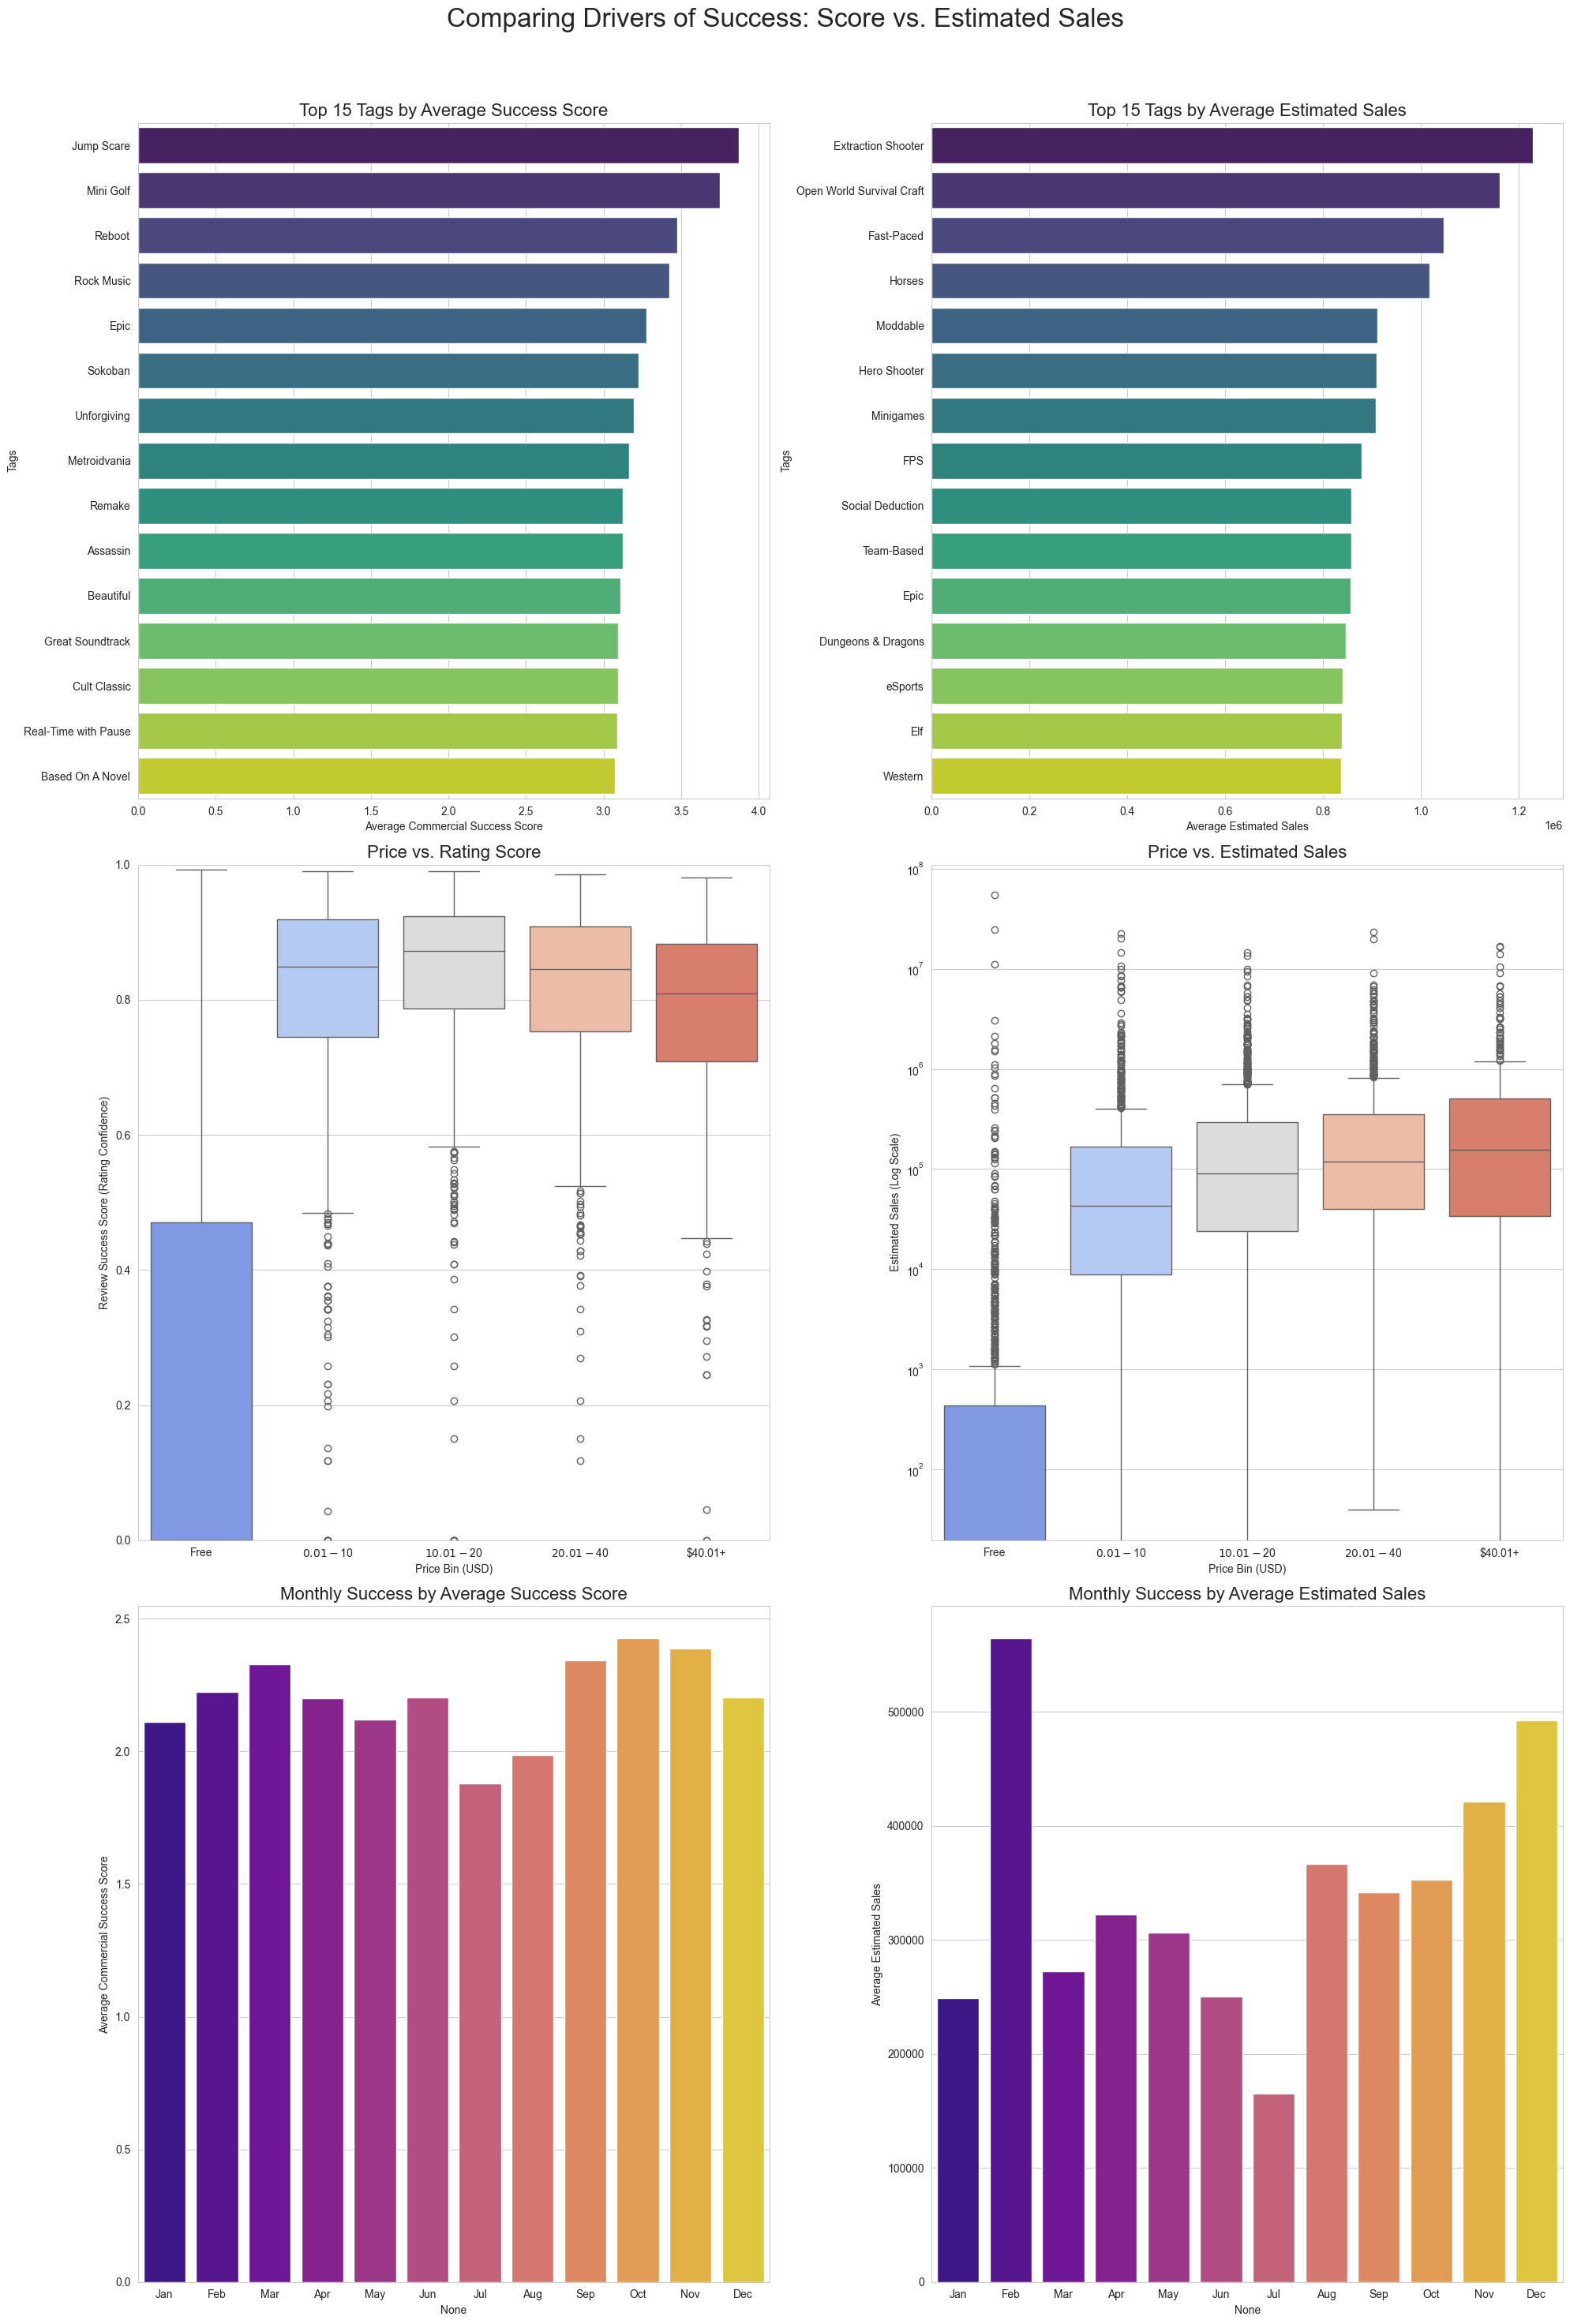

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=PendingDeprecationWarning)

sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(20, 30))
fig.suptitle('Comparing Drivers of Success: Score vs. Estimated Sales', fontsize=24, y=1.01)

tags_df = df.dropna(subset=['Tags']).copy()
tags_df['Tags'] = tags_df['Tags'].str.split(', ')
tags_df = tags_df.explode('Tags')
bins = [-1, 0, 10, 20, 40, 100]
labels = ['Free', '$0.01 - $10', '$10.01 - $20', '$20.01 - $40', '$40.01+']
df['PriceBin'] = pd.cut(df['Price (USD)'], bins=bins, labels=labels)
df['ReleaseDateTime'] = pd.to_datetime(df['Release Date'], errors='coerce')

top_tags_score = tags_df.groupby('Tags')['CommercialSuccessScore'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=top_tags_score.values, y=top_tags_score.index, palette='viridis', ax=axes[0, 0], hue=top_tags_score.index, legend=False)
axes[0, 0].set_title('Top 15 Tags by Average Success Score', fontsize=16)
axes[0, 0].set_xlabel('Average Commercial Success Score')

sns.boxplot(x='PriceBin', y='ReviewSuccessScore', data=df, palette='coolwarm', ax=axes[1, 0], orientation='vertical')
axes[1, 0].set_title('Price vs. Rating Score', fontsize=16)
axes[1, 0].set_xlabel('Price Bin (USD)')
axes[1, 0].set_ylabel('Review Success Score (Rating Confidence)')
axes[1, 0].set_ylim(0, 1)

monthly_score = df.groupby(df['ReleaseDateTime'].dt.month)['CommercialSuccessScore'].mean()
monthly_score.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x=monthly_score.index, y=monthly_score.values, palette='plasma', ax=axes[2, 0], hue=monthly_score.index, legend=False)
axes[2, 0].set_title('Monthly Success by Average Success Score', fontsize=16)
axes[2, 0].set_ylabel('Average Commercial Success Score')

top_tags_sales = tags_df.groupby('Tags')['EstimatedSales'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=top_tags_sales.values, y=top_tags_sales.index, palette='viridis', ax=axes[0, 1], hue=top_tags_sales.index, legend=False)
axes[0, 1].set_title('Top 15 Tags by Average Estimated Sales', fontsize=16)
axes[0, 1].set_xlabel('Average Estimated Sales')

sns.boxplot(x='PriceBin', y='EstimatedSales', data=df, palette='coolwarm', ax=axes[1, 1], orientation='vertical')
axes[1, 1].set_title('Price vs. Estimated Sales', fontsize=16)
axes[1, 1].set_xlabel('Price Bin (USD)')
axes[1, 1].set_ylabel('Estimated Sales (Log Scale)')
axes[1, 1].set_yscale('log')

monthly_sales = df.groupby(df['ReleaseDateTime'].dt.month)['EstimatedSales'].mean()
monthly_sales.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='plasma', ax=axes[2, 1], hue=monthly_sales.index, legend=False)
axes[2, 1].set_title('Monthly Success by Average Estimated Sales', fontsize=16)
axes[2, 1].set_ylabel('Average Estimated Sales')

plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()

df = df.drop(columns=['PriceBin', 'ReleaseDateTime'])

### Correlation Analysis

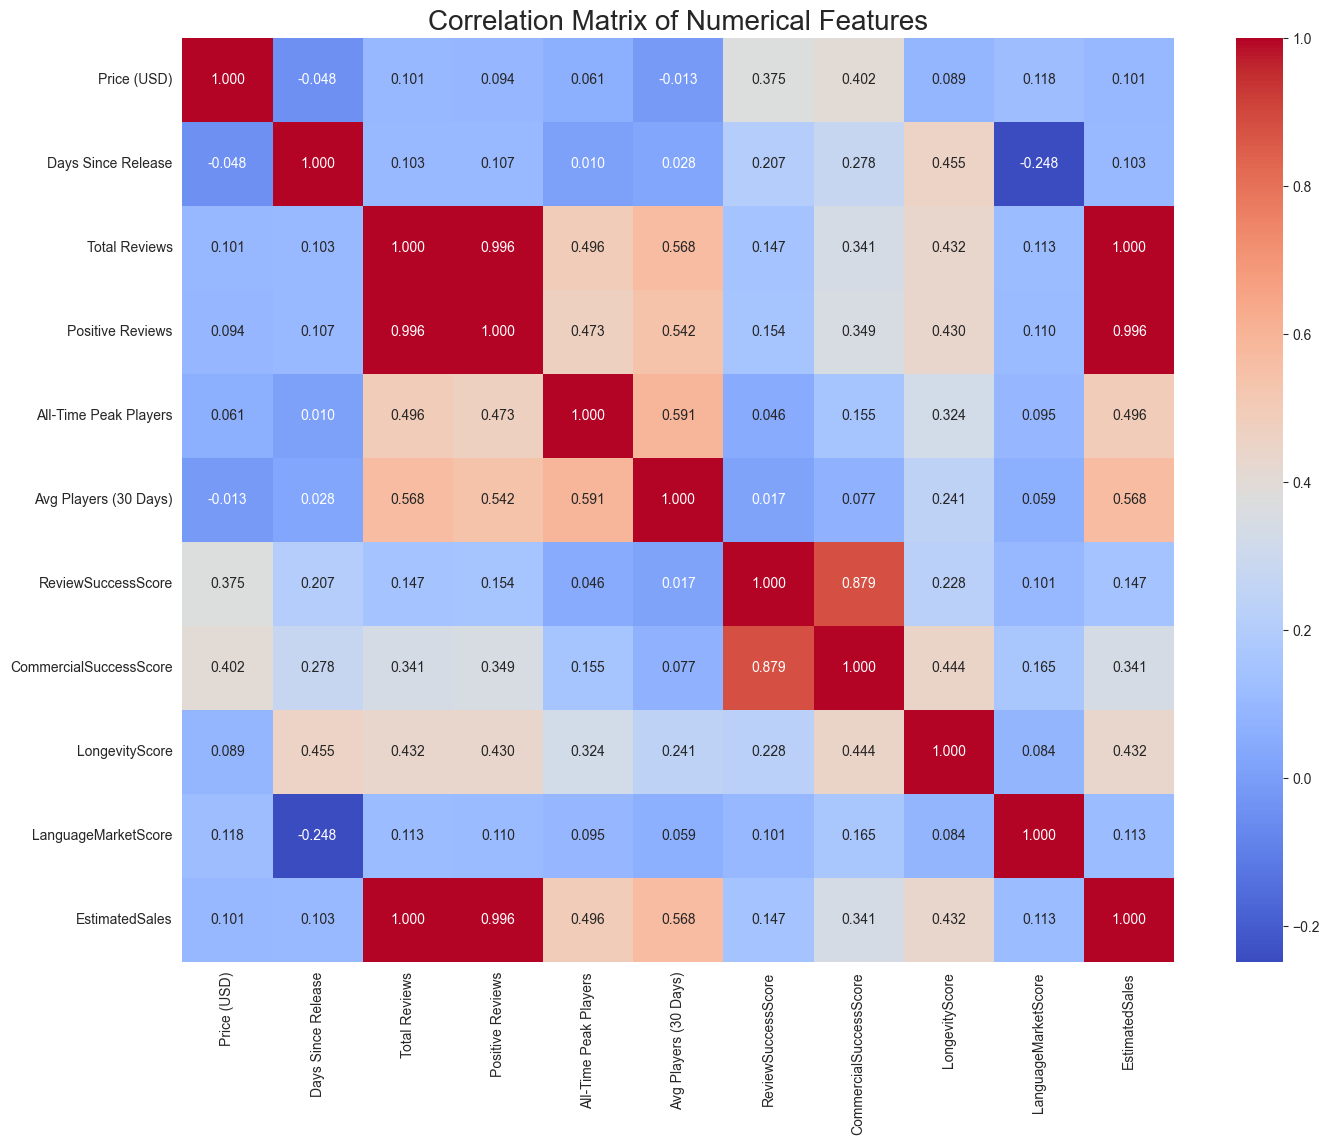

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_df = df[[
    'Price (USD)', 'Days Since Release', 'Total Reviews', 
    'Positive Reviews', 'All-Time Peak Players', 'Avg Players (30 Days)',
    'ReviewSuccessScore', 'CommercialSuccessScore', 'LongevityScore',
    'LanguageMarketScore', 'EstimatedSales'
]]

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(16, 12))

sns.heatmap(
    correlation_matrix, 
    annot=True,
    fmt='.3f',
    cmap='coolwarm'
)

plt.title('Correlation Matrix of Numerical Features', fontsize=20)
plt.show()